# Walmart Sales Forecasting

**Business Problem**

In this project, students are provided with historical sales data for 45 Walmart stores located in different regions. Each store contains many departments, and participants must project the sales for each department in each store. To add to the challenge, selected holiday markdown events are included in the dataset. These markdowns are known to affect sales, but it is challenging to predict which departments are affected and the extent of the impact.

You may only use the provided data to make your predictions.

**Data**

You are provided with historical sales data for 45 Walmart stores located in different regions. Each store contains a number of departments, and you are tasked with predicting the department\-wide sales for each store.

In addition, Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non\-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data.

The basic idea of analyzing the Walmart Forecasting dataset is to get a fair idea about the factors affecting the Sales of the Walmart Store.

•**Objective**: Predicted monthly sales for a retail company using historical data and regression analysis.

•**Methods Used**: Linear regression, data cleaning, feature engineering.

•**Tools**: Python, pandas, scikit\-learn.

•**Results**: Achieved a 15% improvement in forecasting accuracy compared to the existing model, leading

to more informed decision\-making for inventory management.



In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [3]:
# load the dataset
sales_data = pd.read_csv('Walmart_Store_sales.csv')

In [5]:
sales_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
# convert data into month and year seperate
sales_data['Date']

0       05-02-2010
1       12-02-2010
2       19-02-2010
3       26-02-2010
4       05-03-2010
           ...    
6430    28-09-2012
6431    05-10-2012
6432    12-10-2012
6433    19-10-2012
6434    26-10-2012
Name: Date, Length: 6435, dtype: object

In [9]:
sales_data['Date'] = pd.to_datetime(sales_data['Date'], format='%d-%m-%Y')

In [10]:
sales_data['Date']

0      2010-02-05
1      2010-02-12
2      2010-02-19
3      2010-02-26
4      2010-03-05
          ...    
6430   2012-09-28
6431   2012-10-05
6432   2012-10-12
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

In [11]:
sales_data['Month'] = sales_data['Date'].dt.month
sales_data['Year'] = sales_data['Date'].dt.year

In [12]:
sales_data['Month']

0        2
1        2
2        2
3        2
4        3
        ..
6430     9
6431    10
6432    10
6433    10
6434    10
Name: Month, Length: 6435, dtype: int32

In [44]:
sales_data['Months'] = sales_data['Date'].dt.month
sales_data['Months']

0        2
1        2
2        2
3        2
4        3
        ..
6430     9
6431    10
6432    10
6433    10
6434    10
Name: Months, Length: 6435, dtype: int32

In [14]:
import calendar
sales_data['Month'] = sales_data['Month'].apply(lambda x: calendar.month_name[x])

In [15]:
sales_data['Month']

0        February
1        February
2        February
3        February
4           March
          ...    
6430    September
6431      October
6432      October
6433      October
6434      October
Name: Month, Length: 6435, dtype: object

In [16]:
# convert weekly sale into monthly sales

In [18]:
sales_data['Monthly_sales'] = sales_data['Weekly_Sales'] / 4
sales_data['Monthly_sales']

0       410922.7250
1       410489.3600
2       402992.0425
3       352431.8975
4       388701.6700
           ...     
6430    178293.4875
6431    183363.7675
6432    183616.0900
6433    179531.3825
6434    190070.3575
Name: Monthly_sales, Length: 6435, dtype: float64

In [19]:
sales_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Monthly_sales
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,February,2010,410922.7250
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,February,2010,410489.3600
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,February,2010,402992.0425
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,February,2010,352431.8975
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,March,2010,388701.6700


**Exploratory Data Analysis \(EDA\)**


In [20]:
# check missing values
sales_data.isnull().sum()

Store            0
Date             0
Weekly_Sales     0
Holiday_Flag     0
Temperature      0
Fuel_Price       0
CPI              0
Unemployment     0
Month            0
Year             0
Monthly_sales    0
dtype: int64

**Visualize sales trend over time**


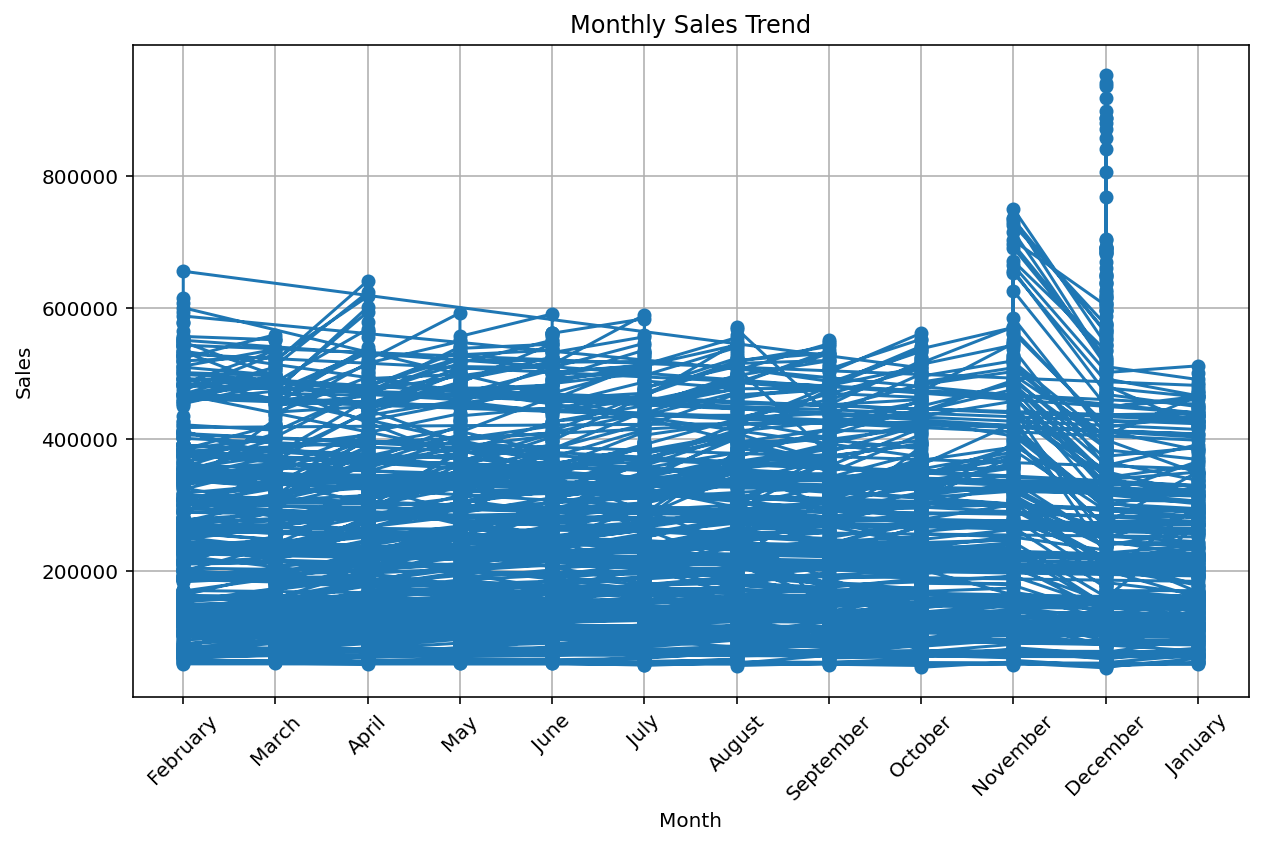

In [23]:
plt.figure(figsize=(10,6))
plt.plot(sales_data['Month'], sales_data['Monthly_sales'], marker='o', linestyle='-')
plt.title("Monthly Sales Trend")
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'February'),
  Text(1, 0, 'March'),
  Text(2, 0, 'April'),
  Text(3, 0, 'May'),
  Text(4, 0, 'June'),
  Text(5, 0, 'July'),
  Text(6, 0, 'August'),
  Text(7, 0, 'September'),
  Text(8, 0, 'October'),
  Text(9, 0, 'November'),
  Text(10, 0, 'December'),
  Text(11, 0, 'January')])

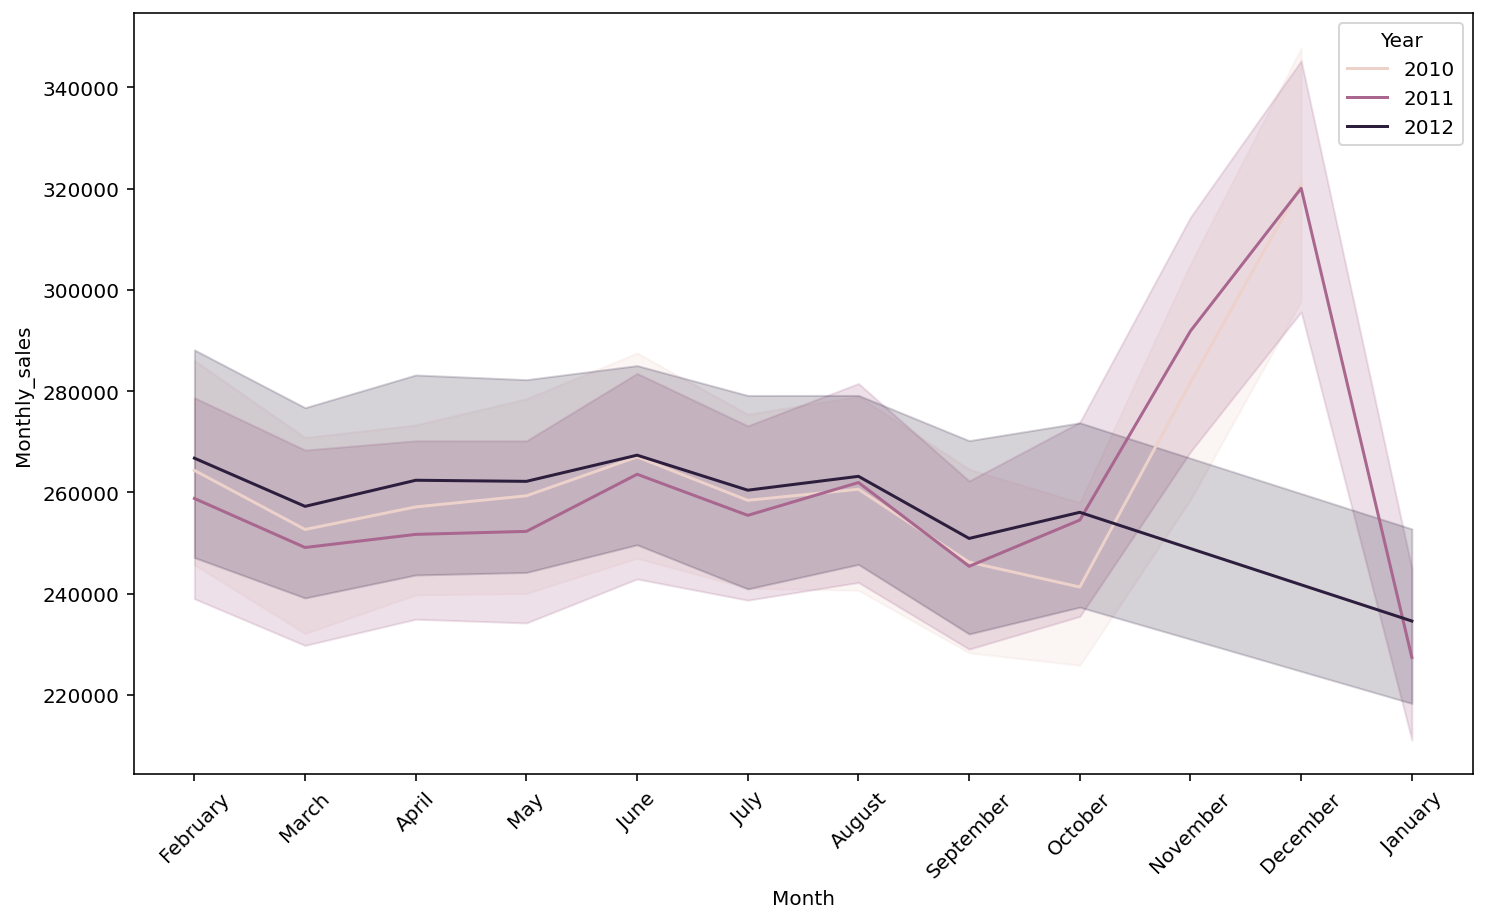

In [30]:
import seaborn as sns
sns.lineplot(x="Month" , y="Monthly_sales",hue="Year", data=sales_data, markers=True, dashes=False)
plt.xticks(rotation=45)

<u>**Feature Engineering**</u>


In [45]:
# Split data into train and test sets

# Aggregate monthly sales data
monthly_sales_data = sales_data.groupby(['Year', 'Months'])['Monthly_sales'].sum().reset_index()
# monthly_sales_data

# Convert month numeric values to month names
monthly_sales_data['Months'] = monthly_sales_data['Months'].apply(lambda x: calendar.month_name[x])

In [46]:
X = sales_data[['Months', 'Year']]
Y = sales_data['Monthly_sales']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

<span style='font-size:large'>**Model training**</span>



In [47]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
# Model evaluation
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [50]:
print('Train RMSE: ', np.sqrt(mean_squared_error(y_train, train_pred)))
print('Test RSME: ', np.sqrt(mean_squared_error(y_test, test_pred)))

Train RMSE:  140431.39191409296
Test RSME:  141627.0477098052


In [52]:
# Predicting monthly sales for future months
future_months = pd.DataFrame({'Months': [4, 5, 6, 7, 8, 9, 10, 11, 12],
                              'Year': [2024]*9})
future_sales = model.predict(future_months)
future_sales

array([241197.86569044, 244581.91714945, 247965.96860846, 251350.02006746,
       254734.07152647, 258118.12298547, 261502.17444448, 264886.22590349,
       268270.27736249])

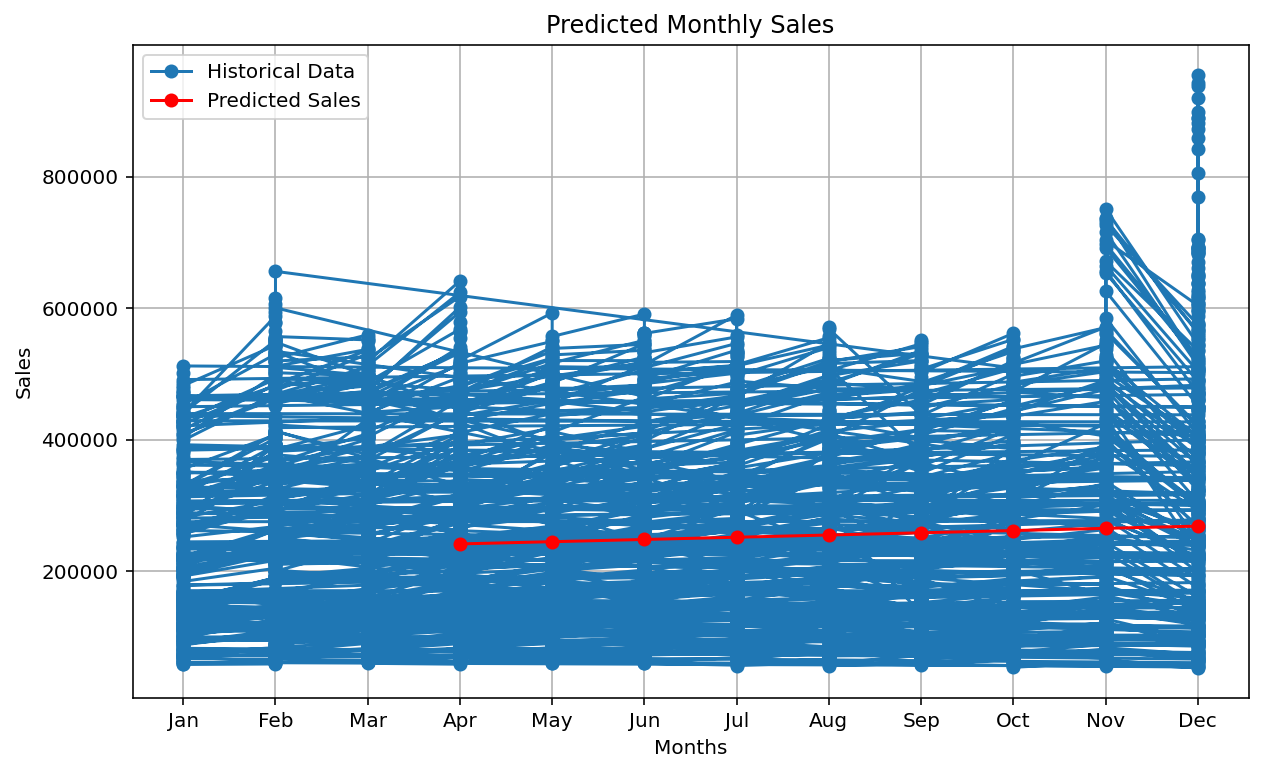

In [56]:
# Visualizing predicted sales for future months
plt.figure(figsize=(10, 6))
plt.plot(sales_data['Months'], sales_data['Monthly_sales'], marker='o', label='Historical Data')
plt.plot(future_months['Months'], future_sales, marker='o', color='red', label='Predicted Sales')
plt.title('Predicted Monthly Sales')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()

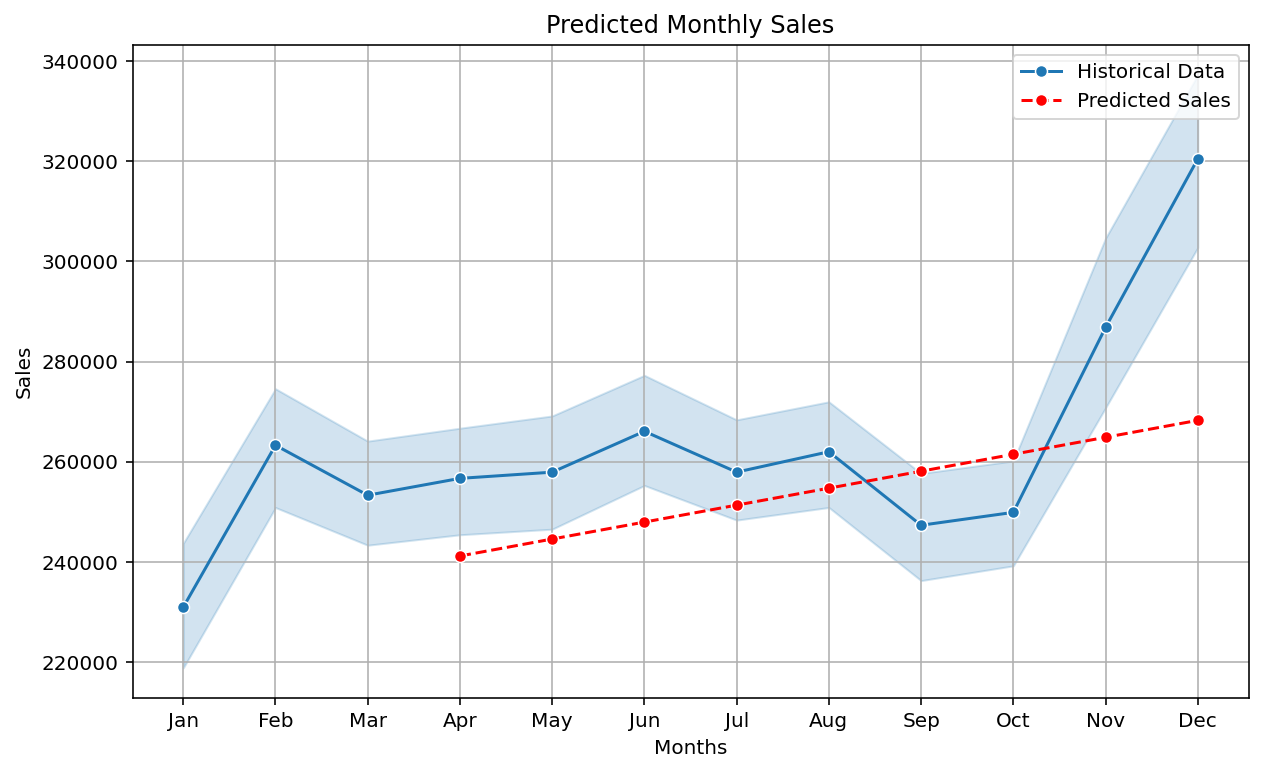

In [62]:
future_sales_data = pd.DataFrame({'Months': future_months['Months'],
                                  'Monthly_sales': future_sales})

# Create a line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_data, x='Months', y='Monthly_sales', marker='o', linestyle='-', label='Historical Data')
sns.lineplot(data=future_sales_data, x='Months', y='Monthly_sales', marker='o', linestyle='--', color='red', label='Predicted Sales')
plt.title('Predicted Monthly Sales')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)

Thank you....😀
